# PandasにおけるTips

In [5]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
from sklearn.model_selection import train_test_split ,LeaveOneOut
from sklearn import tree
import lightgbm as lgb

%matplotlib inline
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ○ 欠損値を読み込んだ時のPandasの挙動
pd.read_csvで何もオプションを指定せずに下記のようなcsvを読み込んだ場合、  
None以外はnp.nanに変換される模様。Noneはそのまま書いても""をつけて書いてもstrとして扱われる。


元のcsv
```
A,B,C
1,2,
3,4,""
5,6,NA
7,8,"NA"
9,10,NaN
11,12,"NaN"
13,14,None
15,16,"None"
```

In [2]:
tmp = pd.read_csv('missing_value_test.csv')
tmp

,A,B,C
0,1,2,NaN
1,3,4,NaN
2,5,6,NaN
3,7,8,NaN
4,9,10,NaN
5,11,12,NaN
6,13,14,None
7,15,16,None


In [9]:
for i in range(0, len(tmp)):
    print( type(tmp['C'].iloc[i]) )

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>


## ○ 行・列ごとに欠損値(NaN,NA)の個数をカウント
sum()ではTrue=1, False=0として処理されるため、sum()をisnull()の結果（欠損値かどうかの判定結果）に適用することで、  
行・列ごとに欠損値NaNの個数をカウントできる。  
デフォルトでは列、引数axis=1とすると行に対して処理される。  
```
print(df.isnull().sum())
# name     1
# age      2
# state    1
# point    3
```  
また、.countでは欠損値を除いた列・行の要素数しかカウントしないが、  
.isnull().count()とすることで、欠損値も含めたカウントができる。



## 特定の条件に当てはまる行だけ落とす

In [2]:
df = sns.load_dataset('mpg') 
# NaNがあると、多項式特徴量に変換するときエラーが出るので排除。
df.dropna(inplace=True)

In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

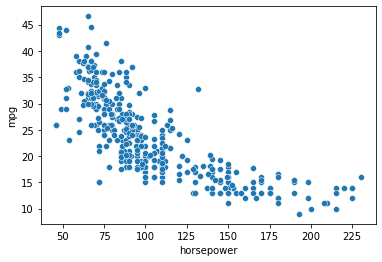

In [30]:
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
sns.scatterplot(x=df['horsepower'], y=y)

このようなデータがあったときに一部のデータ(例えば、50 < horsepower < 75 かつ 30 < mpg < 45)だけ抜き出す、  
あるいは削除したいときは下記のようにすればよい。

In [31]:
# クエリで抽出と元データからの削除
drop_target = df.query('50 < horsepower < 75 & 30 < mpg < 45').index
df = df.drop(index=drop_target).copy()

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

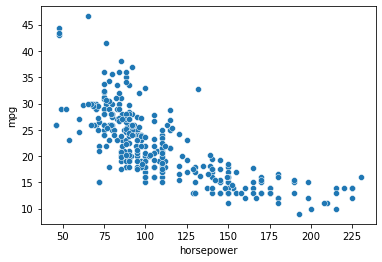

In [33]:
y = df['mpg']
sns.scatterplot(x=df['horsepower'], y=y)

狙った部分が消せている。学習データの不要な部分を削除するときなどに使える。  